[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LokeshBadisa/txv/blob/main/tutorials/explanation_methods_visualization.ipynb)

# Let's install the txv package.

In [1]:
# !pip install txv

# Import necessary libraries. 

In [2]:
import sys
sys.path.append('..')
from txv.exp import *
from txv.utils import *
from txv.vit import *
import matplotlib.pyplot as plt 

# Model Initialization

#### We will use vit-base-patch16-224 model in this tutorial. You can try this with other models in `Available Models` section as well. Note that this package works with models in `Available Models` section only. We initialize 2 models, one with `lrp=True` and other with `lrp=False`. LRP based explanation methods like LRP and Beyond Attention require relevance propogation which is enabled through `lrp=True`.

In [3]:
device = torch.device('cuda:0')
model1 = vit_base_patch16_224(lrp=True).to(device)
model2 = vit_base_patch16_224().to(device)

In [4]:
# Read the image
image = read_image('../images/zebra-elephant.png').to(device)

In [5]:
# Generate the output
output = model1(image)

In [6]:
# Print the top classes
print_top_classes(output)

Top 10 classes:
	340 : zebra                               		value = 12.749	 prob = 94.2%
	386 : African elephant, Loxodonta africana		value = 9.485	 prob = 3.6%
	101 : tusker                              		value = 7.923	 prob = 0.8%
	385 : Indian elephant, Elephas maximus    		value = 7.684	 prob = 0.6%
	352 : impala, Aepyceros melampus          		value = 5.946	 prob = 0.1%
	351 : hartebeest                          		value = 5.460	 prob = 0.1%
	343 : warthog                             		value = 5.416	 prob = 0.1%
	9 : ostrich, Struthio camelus           		value = 5.292	 prob = 0.1%
	353 : gazelle                             		value = 5.248	 prob = 0.1%
	293 : cheetah, chetah, Acinonyx jubatus   		value = 4.881	 prob = 0.0%


#### Note that we use `model1` for LRP which is initialized with `lrp=True` which is not used in further explanation methods(except Beyond Attention).

# LRP

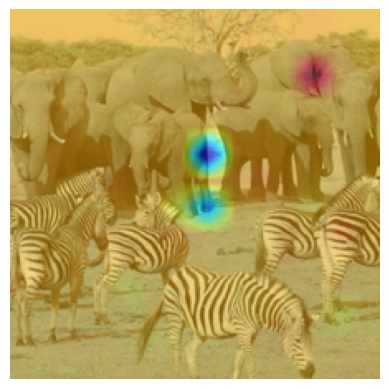

In [7]:
lrp = LRP(model1)
mask_lrp = lrp.explain(image)
inp,mask_lrp = postprocess(image, mask_lrp)
cam = show_exp_on_image(inp[0], mask_lrp[0])
plt.imshow(cam)
plt.axis('off')
plt.show()

# Integrated Gradients

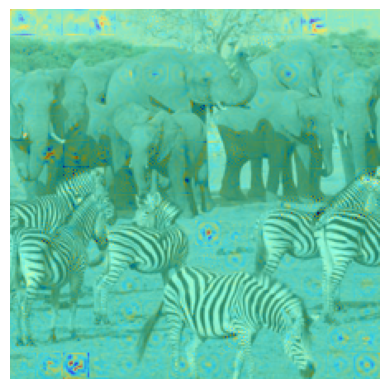

In [8]:
ig = IntegratedGradients(model2)
mask_ig = ig.explain(image)
inp,mask_ig = postprocess(image, mask_ig)
cam = show_exp_on_image(inp[0], mask_ig[0])
plt.imshow(cam)
plt.axis('off')
plt.show()

# Raw Attention

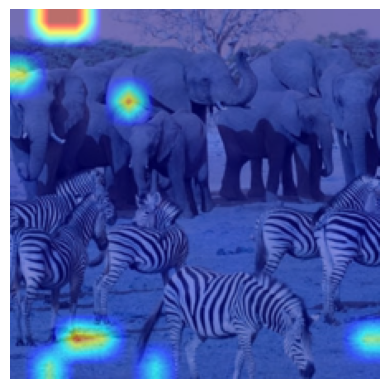

In [9]:
ra = RawAttention(model2)
mask_ra = ra.explain(image,7)

# Take mean over all the heads and then visualize CLS token
mask_ra = mask_ra.mean(dim=1)[:,0,1:]

#Uncomment the below line for distilled models as they have DIST token also.
#You can try visualizing the DIST token as well.
# mask_ra = mask_ra.mean(dim=1)[:,0,2:]

inp,mask_ra = postprocess(image, mask_ra)
cam = show_exp_on_image(inp[0], mask_ra[0])
plt.imshow(cam)
plt.axis('off')
plt.show()

# Attention Rollout  

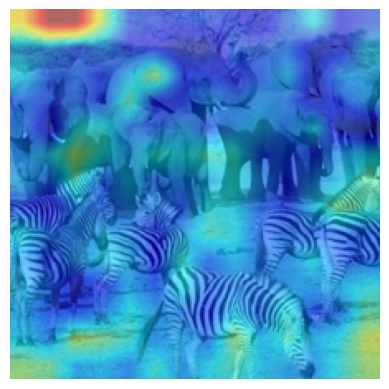

In [10]:
ar = AttentionRollout(model2)
mask_ar = ar.explain(image,layer=1)
inp,mask_ar = postprocess(image, mask_ar)
cam = show_exp_on_image(inp[0], mask_ar[0])
plt.imshow(cam)
plt.axis('off')
plt.show()

# GradSAM

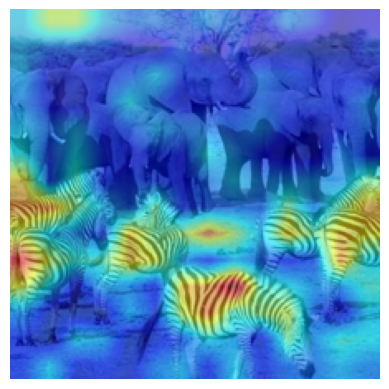

In [11]:
gradsam = GradSAM(model2)
mask_gradsam = gradsam.explain(image)
inp,mask_gradsam = postprocess(image, mask_gradsam)
cam = show_exp_on_image(inp[0], mask_gradsam[0])
plt.imshow(cam)
plt.axis('off')
plt.show()

# Beyond Attention

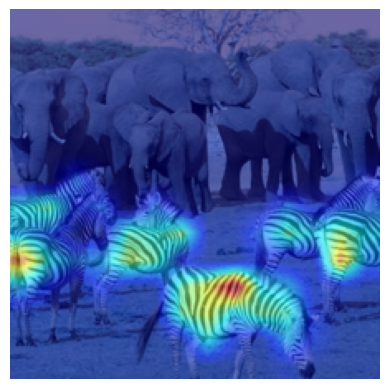

In [12]:
ba = BeyondAttention(model1)
mask_ba = ba.explain(image)
inp,mask_ba = postprocess(image,mask_ba)
cam = show_exp_on_image(inp[0],mask_ba[0])
plt.imshow(cam)
plt.axis('off')
plt.show()

# Generic Attention

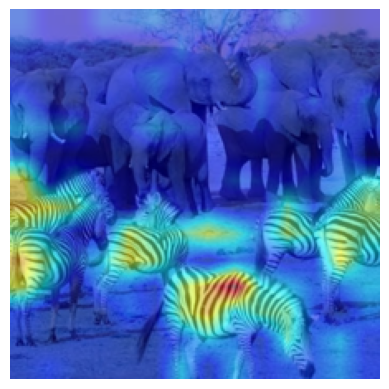

In [13]:
ga = GenericAttention(model2)
mask_ga = ga.explain(image) 
inp,mask_ga = postprocess(image,mask_ga)
cam = show_exp_on_image(inp[0],mask_ga[0])
plt.imshow(cam)
plt.axis('off')
plt.show()

# Transition Attention Map(TAM)

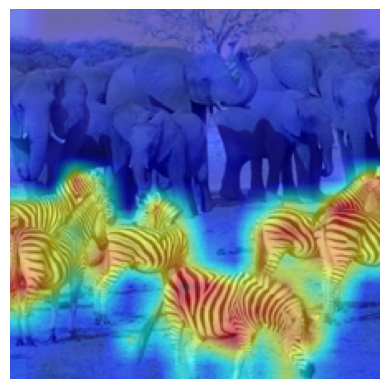

In [14]:
#Note that TAM works with ViT-based models only.
tam = TAM(model2)
mask_tam = tam.explain(image)
inp,mask_tam = postprocess(image, mask_tam)
cam = show_exp_on_image(inp[0], mask_tam[0])
plt.imshow(cam)
plt.axis('off')
plt.show()

# Beyond Intuition - token-wise

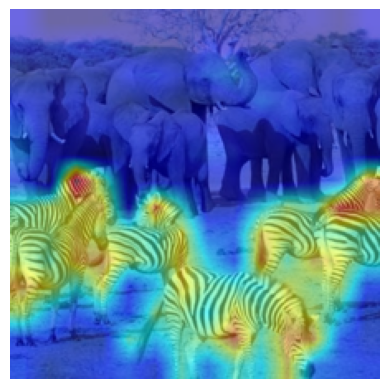

In [15]:
bi = BeyondIntuition(model2)
mask_bi = bi.explain(input=image,method='token')
inp,mask_bi = postprocess(image,mask_bi)
cam = show_exp_on_image(inp[0],mask_bi[0])
plt.imshow(cam)
plt.axis('off')
plt.show()

# Beyond Intuition - head-wise

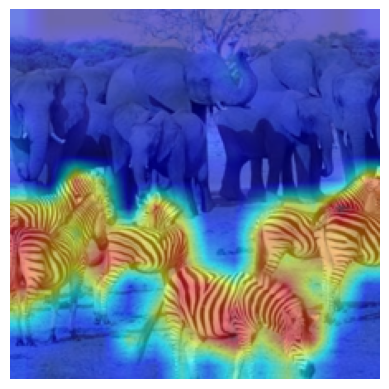

In [16]:
bi = BeyondIntuition(model2)
mask_bi = bi.explain(image,method='head')
inp,mask_bi = postprocess(image,mask_bi)
cam = show_exp_on_image(inp[0],mask_bi[0])
plt.imshow(cam)
plt.axis('off')
plt.show()